In [ ]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

# Load dataset
wine = load_wine()
X, y = wine.data, wine.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Train CART Model (using DecisionTreeClassifier with Gini)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# CART - Gini impurity
cart_clf = DecisionTreeClassifier(criterion='gini', random_state=42, max_depth=3) # Added max_depth
cart_clf.fit(X_train, y_train)
cart_preds = cart_clf.predict(X_test)

Train ID3 Model (using DecisionTreeClassifier with Entropy)

In [ ]:
# ID3 - Entropy based Information Gain
id3_clf = DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=3) # Added max_depth
id3_clf.fit(X_train, y_train)
id3_preds = id3_clf.predict(X_test)

Evaluate and Compare

In [ ]:
print("CART Confusion Matrix:")
print(confusion_matrix(y_test, cart_preds))

print("\nID3 Confusion Matrix:")
print(confusion_matrix(y_test, id3_preds))

print("CART Classification Report:")
print(classification_report(y_test, cart_preds))

print("ID3 Classification Report:")
print(classification_report(y_test, id3_preds))


CART Confusion Matrix:
[[18  1  0]
 [ 0 21  0]
 [ 0  1 13]]

ID3 Confusion Matrix:
[[17  2  0]
 [ 2 17  2]
 [ 2  1 11]]
CART Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        19
           1       0.91      1.00      0.95        21
           2       1.00      0.93      0.96        14

    accuracy                           0.96        54
   macro avg       0.97      0.96      0.96        54
weighted avg       0.97      0.96      0.96        54

ID3 Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.89      0.85        19
           1       0.85      0.81      0.83        21
           2       0.85      0.79      0.81        14

    accuracy                           0.83        54
   macro avg       0.84      0.83      0.83        54
weighted avg       0.83      0.83      0.83        54



Exercise : Try using different values of max_depth - 10, 20 , 50, 100

visualize the tree structures using:

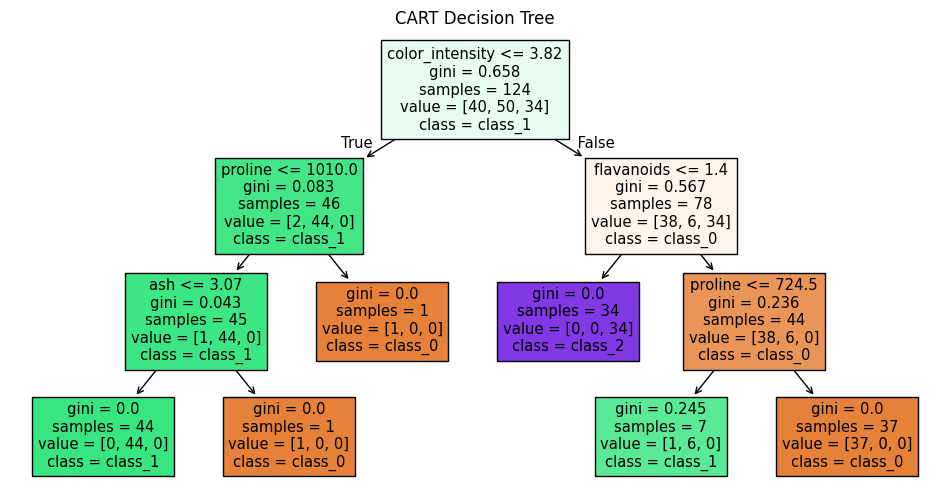

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plot_tree(cart_clf, feature_names=wine.feature_names, class_names=wine.target_names, filled=True)
plt.title("CART Decision Tree")
plt.show()


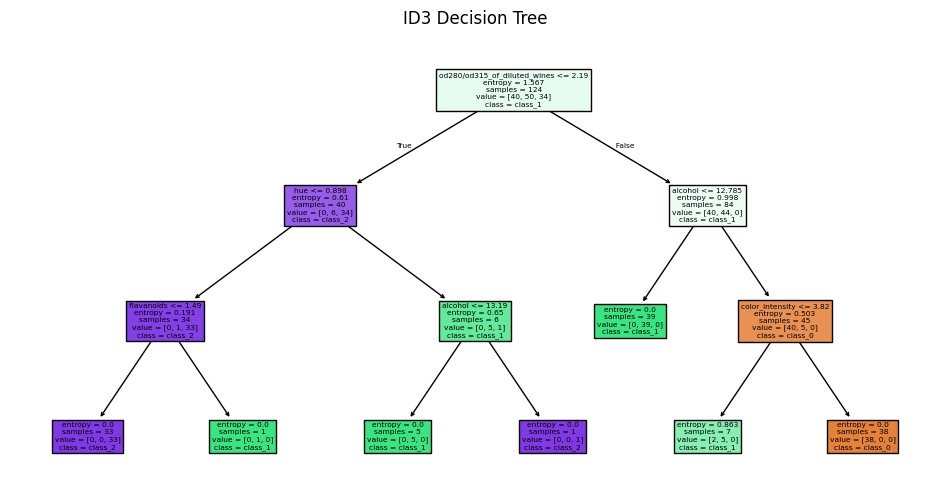

In [ ]:
plt.figure(figsize=(12, 6))
plot_tree(id3_clf, feature_names=wine.feature_names, class_names=wine.target_names, filled=True)
plt.title("ID3 Decision Tree")
plt.show()
